In [2]:
import pandas as pd
import numpy as np
import requests
import mysql.connector

In [3]:
orders = pd.read_csv('Orders.csv')
products = pd.read_csv('products.csv')
orders_items = pd.read_csv('order_items.csv')
customers = pd.read_csv('customers.csv')
inventory = pd.read_csv('inventory.csv')
suppliers = pd.read_csv('suppliers_data.csv')

dataframes = [orders, products, orders_items, customers, inventory, suppliers]
date_columns = ['order_date', 'join_date', 'stock_date']


In [4]:
def clean_code(df):
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    if any(col in df.columns for col in date_columns):
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col])

for df in dataframes:
    clean_code(df)

In [5]:
suppliers.drop_duplicates(subset=['supplier_name', 'supplier_address', 'email', 'contact_number', 'fax', 'account_number', 'supplier_country', 'supplier_city', 'country_code'], inplace=True)

sales_df = orders.merge(products, on='product_id')


In [6]:
sales_df.dropna(inplace=True)
sales_df.drop_duplicates(inplace=True)
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])
sales_df['total_revenue']  = np.multiply(sales_df['quantity'], sales_df['price'])

In [7]:
sales_df['year'] = sales_df['order_date'].dt.year
sales_df['month'] = sales_df['order_date'].dt.month

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month', ylabel='Total Revenue'>

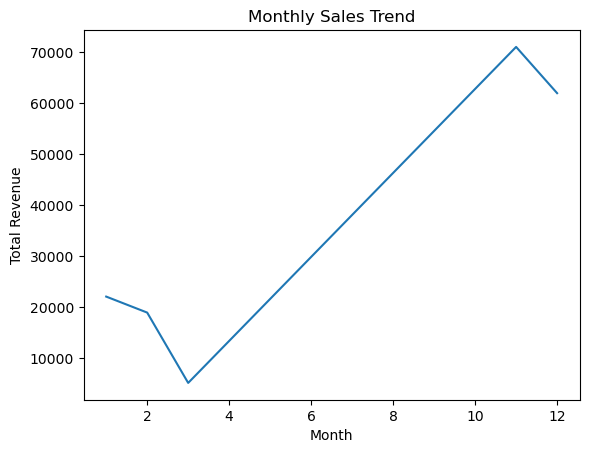

In [8]:
monthly_sales = sales_df.groupby('month')['total_revenue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', xlabel='Month', ylabel='Total Revenue')

In [9]:
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="123password!",
    database="shopease"
)

# Verify the connection
if connection.is_connected():
    print("Connected to MySQL database!")
else:
    print("Connection failed.")

Connected to MySQL database!


In [10]:
cursor = connection.cursor()

In [ ]:
cursor.execute('''
CREATE SCHEMA IF NOT EXISTS shopease;
''')

In [11]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.sales (
    order_id INT,
    customer_id INT,
    order_date DATE,
    product_id INT,
    quantity INT,
    product_name VARCHAR(50),
    category VARCHAR(50),
    price FLOAT,
    total_revenue FLOAT,
    year INT,
    month INT
);
''')

In [12]:
for index, row in sales_df.iterrows():
    cursor.execute('''
    INSERT INTO shopease.sales (order_id, customer_id, order_date, product_id, quantity, product_name, category, price, total_revenue, year, month)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    ''', (row['order_id'], row['Cutomer_id'], row['order_date'], row['product_id'], row['quantity'], row['product_name'], row['category'], row['price'], row['total_revenue'], row['year'], row['month']))


In [13]:
cursor.execute('''
SELECT * FROM shopease.sales
'''
)
sales =  cursor.fetchall()
print(sales)

[(1, 20, datetime.date(2024, 11, 1), 3, 2, 'Tablet', 'Electronics', 450.0, 900.0, 2024, 11), (2, 36, datetime.date(2024, 11, 1), 1, 1, 'Laptop', 'Electronics', 1200.0, 1200.0, 2024, 11), (3, 1, datetime.date(2024, 11, 1), 8, 3, 'Headphones', 'Electronics', 150.0, 450.0, 2024, 11), (4, 36, datetime.date(2024, 11, 2), 6, 1, 'Smartwatch', 'Electronics', 200.0, 200.0, 2024, 11), (5, 14, datetime.date(2024, 11, 2), 12, 2, 'Desk', 'Furniture', 300.0, 600.0, 2024, 11), (6, 8, datetime.date(2024, 11, 2), 25, 4, 'Oven', 'Home Appliances', 250.0, 1000.0, 2024, 11), (7, 18, datetime.date(2024, 11, 3), 19, 1, 'Microwave', 'Home Appliances', 150.0, 150.0, 2024, 11), (8, 47, datetime.date(2024, 11, 3), 15, 1, 'Sofa', 'Furniture', 500.0, 500.0, 2024, 11), (9, 22, datetime.date(2024, 11, 3), 33, 3, 'Juice', 'Food', 2.0, 6.0, 2024, 11), (10, 8, datetime.date(2024, 11, 4), 7, 2, 'Camera', 'Electronics', 650.0, 1300.0, 2024, 11), (11, 31, datetime.date(2024, 11, 4), 9, 3, 'Charger', 'Electronics', 30.0, 

In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.orders (
    order_id INT PRIMARY KEY,
    customer_id INT,
    order_date DATE,
    product_id INT,
    quantity INT
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.products (
    product_id INT PRIMARY KEY,
    product_name VARCHAR(50),
    category VARCHAR(50),
    price DECIMAL
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.order_items (
    order_detail_id INT PRIMARY KEY,
    order_id INT,
    quantity INT,
    product_id INT
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.customers (
    customer_id INT PRIMARY KEY,
    customer_name VARCHAR(50),
    email VARCHAR(50),
    join_date DATE
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.inventory (
    product_name VARCHAR(50),
    stock_quantity INT,
    stock_date DATE,
    supplier VARCHAR(50),
    warehouse_location VARCHAR(50)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS shopease.suppliers (
    supplier_name VARCHAR(50) PRIMARY KEY,
    supplier_address VARCHAR(50),
    email VARCHAR(50),
    contact_number VARCHAR(50),
    fax VARCHAR(50),
    account_number VARCHAR(50),
    order_history VARCHAR(50),
    contract VARCHAR(50),
    supplier_country VARCHAR(50),
    supplier_city VARCHAR(50),
    country_code VARCHAR(50)
);
''')


In [ ]:
cursor.execute('''
ALTER TABLE shopease.orders
MODIFY COLUMN order_id INT AUTO_INCREMENT;
''')

# Alter `products` table to make `product_id` auto-increment
cursor.execute('''
ALTER TABLE shopease.products
MODIFY COLUMN product_id INT AUTO_INCREMENT;
''')

# Alter `order_items` table to make `order_detail_id` auto-increment
cursor.execute('''
ALTER TABLE shopease.order_items
MODIFY COLUMN order_detail_id INT AUTO_INCREMENT;
''')

# Alter `suppliers` table to add and make `supplier_id` auto-increment
cursor.execute('''
ALTER TABLE shopease.suppliers
ADD COLUMN supplier_id INT AUTO_INCREMENT;
''')

In [ ]:
for index, row in orders.iterrows():
    print(row)
    cursor.execute('''
    INSERT INTO shopease.orders (customer_id, order_date, product_id, quantity)
    VALUES (%s, %s, %s, %s)
    ''', (row['Cutomer_id'], row['order_date'], row['product_id'], row['quantity']))

for index, row in products.iterrows():
    cursor.execute('''
    INSERT INTO shopease.products (product_name, category, price)
    VALUES (%s, %s, %s)
    ''', (row['product_name'], row['category'], row['price']))

# print(orders_items.dtypes)
for index, row in orders_items.iterrows():
    cursor.execute('''
    INSERT INTO shopease.order_items (order_id, quantity, product_id)
    VALUES (%s, %s, %s)
    ''', (int(row['order_id']), int(row['quantity']), int(row['product_id'])))

for index, row in customers.iterrows():
    cursor.execute('''
    INSERT INTO shopease.customers (customer_id, customer_name, email, join_date)
    VALUES (%s, %s, %s, %s)
    ''', (row['customer_id'], row['customer_name'], row['email'], row['join_date']))

for index, row in inventory.iterrows():
    cursor.execute('''
    INSERT INTO shopease.inventory (product_name, stock_quantity, stock_date, supplier, warehouse_location)
    VALUES (%s, %s, %s, %s, %s)
    ''', (row['product_name'], row['stock_quantity'], row['stock_date'], row['supplier'], row['warehouse_location']))

for index, row in suppliers.iterrows():
    cursor.execute('''
    INSERT INTO shopease.suppliers (supplier_name, supplier_address, email, contact_number, fax, account_number, order_history, contract, supplier_country, supplier_city, country_code)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    ''', (row['supplier_name'], row['supplier_address'], row['email'], row['contact_number'], row['fax'], row['account_number'], row['order_history'], row['contract'], row['supplier_country'], row['supplier_city'], row['country_code']))



In [ ]:
connection.commit()
cursor.close()
connection.close()